<a href="https://colab.research.google.com/github/yaroslavtsepkov/colab/blob/master/analysis_paramets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from matplotlib.pylab import rc, plot
# For plotting confusion matrix
import seaborn as sns
# Models
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, accuracy_score, roc_curve, recall_score, f1_score, precision_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.utils import shuffle

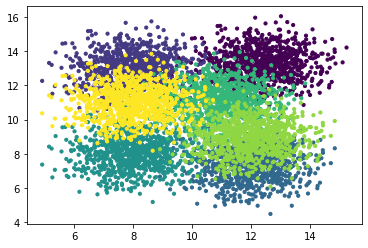

In [ ]:
N = 7
M = 888

noise = np.random.randn(M,2)

cloud1 = noise + np.array([2.4,3.2]) + 10
cloud2 = noise + np.array([-2, 2.9]) + 10
cloud3 = noise + np.array([2, -2.7]) + 10
cloud4 = noise + np.array([-2, -2]) + 10
cloud5 = noise + np.array([1, 1.1]) + 10
cloud6 = noise + np.array([2, -1.1]) + 10
cloud7 = noise + np.array([-2, 1]) + 10

annotation1 = [0]*M
annotation2 = [1]*M
annotation3 = [2]*M
annotation4 = [3]*M
annotation5 = [4]*M
annotation6 = [5]*M
annotation7 = [6]*M
annotations = annotation1 + annotation2 + annotation3 + annotation4 + annotation5 + annotation6 + annotation7

data = np.vstack([cloud1, cloud2, cloud3, cloud4, cloud5, cloud6, cloud7])

fig, ax = plt.subplots()
ax.scatter(data[:,0], data[:,1], c=annotations, s=10)
plt.show()

In [ ]:
data, annotations = shuffle(data, annotations)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, annotations, test_size=0.25)
model = GaussianNB()
model.fit(Xtrain, Ytrain)
pred = model.predict(Xtest)
accuracy_score(Ytest,pred)

0.7947232947232947

In [ ]:
report = classification_report(Ytest,pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       234
           1       0.77      0.84      0.81       215
           2       0.78      0.79      0.79       190
           3       0.92      0.92      0.92       226
           4       0.74      0.69      0.72       234
           5       0.70      0.70      0.70       214
           6       0.75      0.71      0.73       241

    accuracy                           0.79      1554
   macro avg       0.79      0.80      0.79      1554
weighted avg       0.79      0.79      0.79      1554



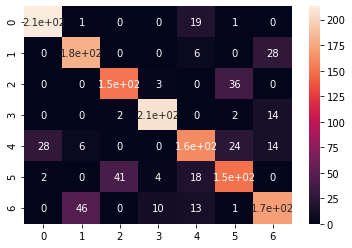

In [ ]:
conf_mat = confusion_matrix(Ytest, pred)
sns.heatmap(conf_mat, annot=True)
plt.show()

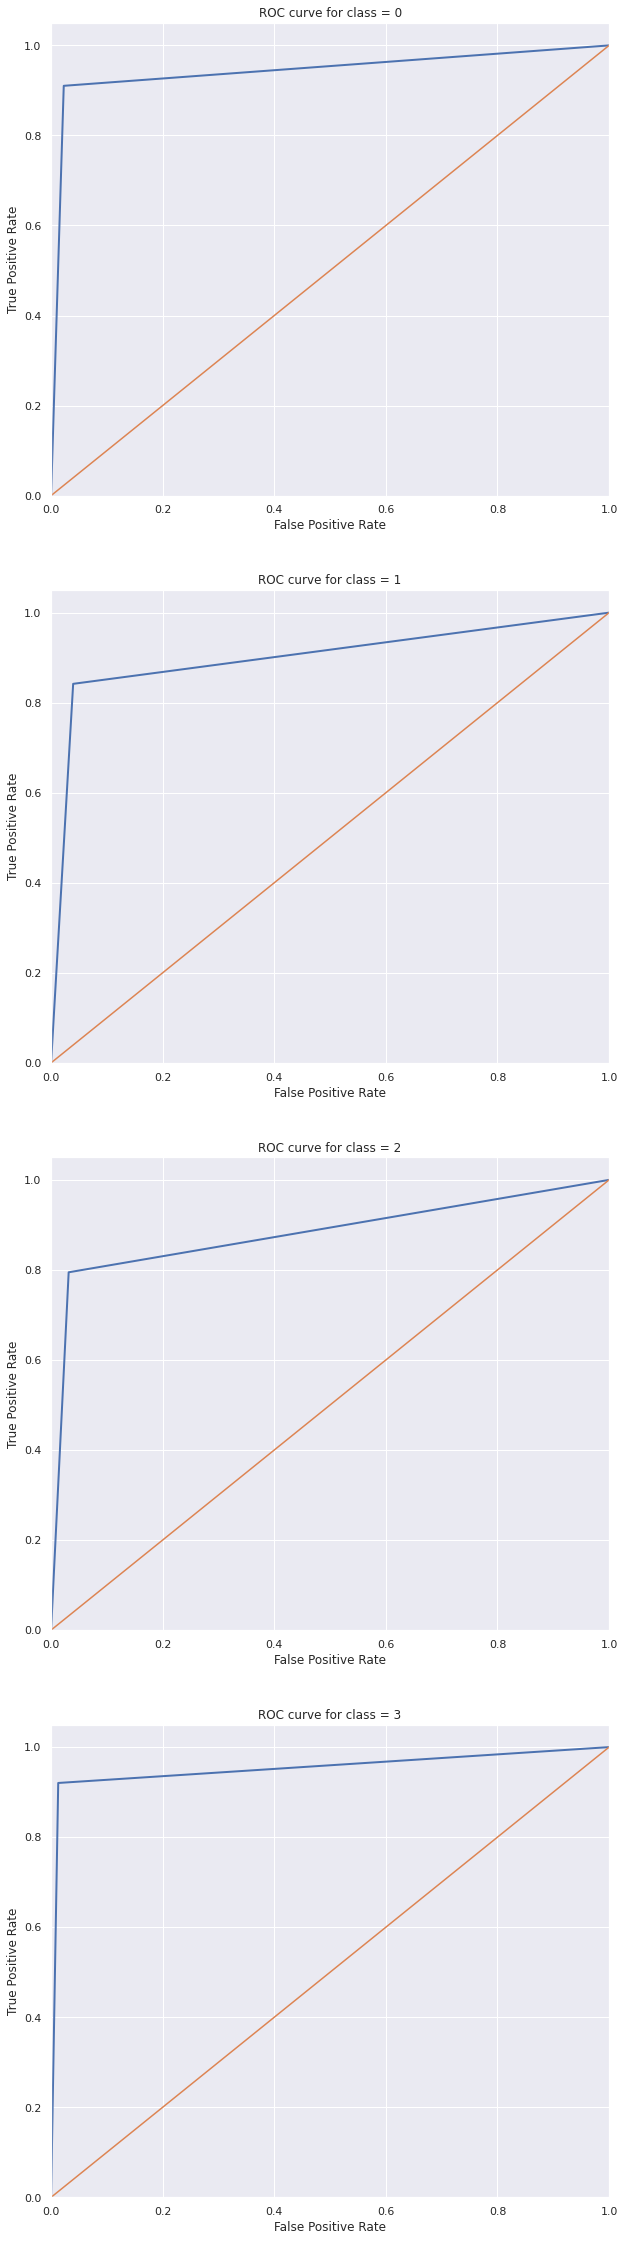

In [ ]:
Ytest = np.asarray(Ytest)

sns.set(font_scale=1)
sns.set_color_codes("muted")

lw = 2
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 40))
for i in range(4):   
    fpr, tpr, thresholds = roc_curve(Ytest == i, pred == i, pos_label=1)
    axs[i].plot(fpr, tpr, lw=lw, label='ROC curve ')
    axs[i].plot([0, 1], [0, 1])
    axs[i].set_xlim([0.0, 1.0])
    axs[i].set_ylim([0.0, 1.05])
    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')
    axs[i].set_title(f'ROC curve for class = {i}')

plt.show()

In [ ]:
def false_negative_score(Ytrue, Ypred):
    conf_mat = confusion_matrix(Ytrue, Ypred)
    FN = conf_mat.sum(axis=1) - np.diag(conf_mat)
    return FN.sum() / conf_mat.sum()

# DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
cvs = cross_val_score(model, Xtrain, Ytrain)

In [ ]:
metrics = ['precision_macro', 'recall_macro', 'f1_macro']
cv = cross_validate(model, Xtrain, Ytrain, scoring=metrics, return_train_score=True)
cv

{'fit_time': array([0.01457715, 0.01152539, 0.01181054, 0.01157045, 0.01122284]),
 'score_time': array([0.00606275, 0.00564218, 0.00513911, 0.00499225, 0.00497317]),
 'test_f1_macro': array([0.69257592, 0.67901926, 0.68098328, 0.71007784, 0.69679391]),
 'test_precision_macro': array([0.69387006, 0.68108998, 0.68214524, 0.71303407, 0.69767385]),
 'test_recall_macro': array([0.69244976, 0.67871949, 0.68040813, 0.70915714, 0.69743907]),
 'train_f1_macro': array([1., 1., 1., 1., 1.]),
 'train_precision_macro': array([1., 1., 1., 1., 1.]),
 'train_recall_macro': array([1., 1., 1., 1., 1.])}

In [ ]:
treeParams = {
    'criterion':['gini','entropy'],
    'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
}

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=treeParams,cv=5)

In [ ]:
start = time.time()
grid.fit(Xtrain, Ytrain)
end = time.time() - start
pred = grid.predict(Xtest)

In [ ]:
accuracy_score(Ytest, pred)
print('the best with GridSearchCV: ', grid.best_params_)
report = classification_report(Ytest,pred)
print(report)
print('false negative scoring:', false_negative_score(Ytest,pred))

the best with GridSearchCV:  {'criterion': 'gini', 'max_depth': 5}
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       234
           1       0.71      0.86      0.78       215
           2       0.78      0.76      0.77       190
           3       0.94      0.89      0.92       226
           4       0.68      0.71      0.70       234
           5       0.67      0.71      0.69       214
           6       0.76      0.58      0.66       241

    accuracy                           0.77      1554
   macro avg       0.77      0.77      0.77      1554
weighted avg       0.77      0.77      0.77      1554

false negative scoring: 0.22972972972972974


In [ ]:
data = {'0': ['GridSearchCV tree', end, false_negative_score(Ytest, pred),len(grid.cv_results_['params']), accuracy_score(Ytest, pred)]}

In [ ]:
grid = RandomizedSearchCV(estimator=model, param_distributions=treeParams)

In [ ]:
start = time.time()
grid.fit(Xtrain, Ytrain)
end = time.time() - start
pred = grid.predict(Xtest)

In [ ]:
accuracy_score(Ytest, pred)
print('the best with RandomSearchCV:', grid.best_params_)
report = classification_report(Ytest,pred)
print(report)
print('false negative scoring:', false_negative_score(Ytest,pred))

the best with RandomSearchCV: {'max_depth': 6, 'criterion': 'gini'}
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       234
           1       0.77      0.80      0.79       215
           2       0.77      0.76      0.77       190
           3       0.94      0.91      0.93       226
           4       0.74      0.65      0.69       234
           5       0.68      0.73      0.70       214
           6       0.72      0.72      0.72       241

    accuracy                           0.78      1554
   macro avg       0.78      0.78      0.78      1554
weighted avg       0.78      0.78      0.78      1554

false negative scoring: 0.21621621621621623


In [ ]:
data['1'] = ['RandomSearchCV tree', end, false_negative_score(Ytest, pred),len(grid.cv_results_['params']), accuracy_score(Ytest, pred)]

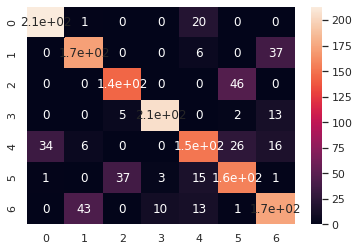

In [ ]:
conf_mat = confusion_matrix(Ytest, pred)
sns.heatmap(conf_mat, annot=True)
plt.show()

#  KNeighborsClassifier

In [ ]:
knn_params = {
    'n_neighbors':[3,5,7,8,9,15,17,21],
    'weights': ['uniform', 'distance']
}

In [ ]:
model = KNeighborsClassifier()

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=knn_params)
start = time.time()
grid.fit(Xtrain, Ytrain)
end = time.time() - start
pred = grid.predict(Xtest)

In [ ]:
print('accuracy:',accuracy_score(Ytest, pred))
print('the best with GridSearchCV for KNN: ', grid.best_params_)
report = classification_report(Ytest,pred)
print(report)
print('false negative scoring:', false_negative_score(Ytest,pred))

accuracy: 0.7824967824967825
the best with GridSearchCV for KNN:  {'n_neighbors': 17, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       234
           1       0.74      0.83      0.78       215
           2       0.77      0.77      0.77       190
           3       0.92      0.92      0.92       226
           4       0.73      0.71      0.72       234
           5       0.70      0.70      0.70       214
           6       0.74      0.66      0.69       241

    accuracy                           0.78      1554
   macro avg       0.78      0.78      0.78      1554
weighted avg       0.78      0.78      0.78      1554

false negative scoring: 0.2175032175032175


In [ ]:
data['2'] = ['GridSearchCV  knn', end, false_negative_score(Ytest, pred),len(grid.cv_results_['params']), accuracy_score(Ytest, pred)]

In [ ]:
grid = RandomizedSearchCV(estimator=model, param_distributions=knn_params)
start = time.time()
grid.fit(Xtrain, Ytrain)
end = time.time() - start
pred = grid.predict(Xtest)

In [ ]:
accuracy_score(Ytest, pred)
print('the best with RandomizedSearchCV: ', grid.best_params_)
report = classification_report(Ytest,pred)
print(report)
print('false negative scoring:', false_negative_score(Ytest,pred))

the best with RandomizedSearchCV:  {'weights': 'uniform', 'n_neighbors': 17}
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       234
           1       0.74      0.83      0.78       215
           2       0.77      0.77      0.77       190
           3       0.92      0.92      0.92       226
           4       0.73      0.71      0.72       234
           5       0.70      0.70      0.70       214
           6       0.74      0.66      0.69       241

    accuracy                           0.78      1554
   macro avg       0.78      0.78      0.78      1554
weighted avg       0.78      0.78      0.78      1554

false negative scoring: 0.2175032175032175


In [ ]:
data['3'] = ['RandomizedSearchCV  knn', end, false_negative_score(Ytest, pred),len(grid.cv_results_['params']), accuracy_score(Ytest, pred)]

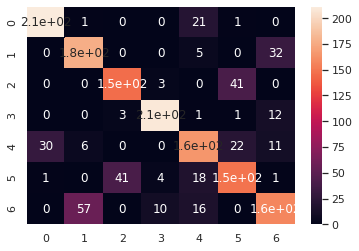

In [ ]:
conf_mat = confusion_matrix(Ytest, pred)
sns.heatmap(conf_mat, annot=True)
plt.show()

# Total

In [ ]:
df = pd.DataFrame.from_dict(data, orient='index', columns=['name', 'time', 'fn', 'parametrs', 'accuracy'])

In [ ]:
df['time for parametrs'] = df.parametrs / df.time

In [ ]:
df

,name,time,fn,parametrs,accuracy,time for parametrs
0,GridSearchCV tree,3.157423,0.229730,36,0.770270,11.401705
1,RandomSearchCV tree,0.886636,0.216216,10,0.783784,11.278582
2,GridSearchCV knn,1.629241,0.217503,16,0.782497,9.820522
3,RandomizedSearchCV knn,1.039721,0.217503,10,0.782497,9.617965
